# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Version:** 0.250331.2218

**DANDI Archive Link:** [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)

**Important Note:** This notebook was AI-generated based on the Dandiset metadata and a selected NWB file. It has not been fully verified by human neuroscientists. Please exercise caution when interpreting the code or results, and verify any findings independently.

## Overview of the Dandiset

This Dandiset, titled "Calcium imaging in SMA and M1 of macaques," contains data from a study investigating motor cortices in non-human primates using one-photon calcium imaging and miniature microscopes. The researchers aimed to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in rhesus macaques. Gradient index (GRIN) lenses were implanted, and GCaMP6f was expressed to image calcium transients while animals were at rest or engaged in an arm reaching task. The study focused on tracking neuronal activity across conditions, examining cell pair synchrony, and assessing sequential activation patterns in SMA and M1.

**Keywords:** One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens.

## Notebook Goals

This notebook aims to:
1. Demonstrate how to connect to the DANDI archive and retrieve metadata for this Dandiset.
2. Show how to list and access assets (NWB files) within the Dandiset.
3. Illustrate loading a specific NWB file and inspecting its basic metadata.
4. Provide examples of accessing and visualizing optical physiology data, specifically:
    - Plotting ROI (Region of Interest) fluorescence traces over time.
    - Visualizing the spatial footprints (image masks) of the ROIs.
5. Offer a starting point for users to conduct their own analyses on this rich dataset.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive API)
- `pynwb` (for reading NWB files)
- `h5py` (NWB files are HDF5-based)
- `remfile` (for streaming remote files)
- `matplotlib` (for plotting)
- `numpy` (for numerical operations)
- `seaborn` (for enhanced plot styling)

It is assumed that these packages are already installed in your Python environment.

## 1. Connecting to DANDI and Loading Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001174"
dandiset_version = "0.250331.2218"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

In [3]:
# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset ID: {metadata.get('id', 'N/A')}")
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'N/A')}") # This URL might point to the general dandiset, not version specific
print(f"Dandiset Version: {dandiset_version}")
print(f"Description: {metadata.get('description', 'N/A')}")

Dandiset ID: DANDI:001174/0.250331.2218
Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Dandiset Version: 0.250331.2218
Description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation foll

### Listing Assets in the Dandiset

In [4]:
assets = dandiset.get_assets()
print("First 5 assets in the Dandiset:")
for asset_count, asset in enumerate(islice(assets, 5)):
    print(f"- Path: {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)") # Changed asset.asset_id to asset.identifier
    if asset_count == 0: # Store the first asset for later use
        first_asset_path = asset.path
        first_asset_id = asset.identifier # Changed asset.asset_id to asset.identifier
        first_asset_url = f"https://api.dandiarchive.org/api/assets/{first_asset_id}/download/"

First 5 assets in the Dandiset:
- Path: sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2, Size: 10659709412 bytes)
- Path: sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d, Size: 790140856 bytes)
- Path: sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48, Size: 787845832 bytes)
- Path: sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3, Size: 1695928224 bytes)
- Path: sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea, Size: 1557206224 bytes)


## 2. Loading an NWB File

We will now load one of the NWB files from the Dandiset. For this demonstration, we'll use the first NWB file listed:
`sub-F/sub-F_ses-20240213T110430_ophys.nwb`.

The direct download URL for this asset (ID: `193fee16-550e-4a8f-aab8-2383f6d57a03`) is:
`https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/`

We will use this hardcoded URL as per the initial instructions for consistency, but in a more general workflow, you might construct this URL from the asset ID obtained above.

In [5]:
# Define the URL for the NWB file we'll analyze
# We will use the URL of the first asset found earlier.
if 'first_asset_url' in locals():
    nwb_file_url = first_asset_url
    print(f"Attempting to load NWB file (first asset from listing): {nwb_file_url}")
    print(f"Path of this asset: {first_asset_path}") # Show path as well
else:
    # Fallback or error if first_asset_url wasn't defined (should not happen in normal flow)
    print("Error: first_asset_url not found. Using a default hardcoded URL for demonstration.")
    print("This indicates an issue in the asset listing step if it was supposed to define first_asset_url.")
    nwb_file_url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/" # Original fallback
    print(f"Using fallback URL: {nwb_file_url}")

Attempting to load NWB file (first asset from listing): https://api.dandiarchive.org/api/assets/a2b04c7f-f671-4a55-ac36-5df4d842dfc2/download/
Path of this asset: sub-V/sub-V_ses-20230309T110929_ophys.nwb


In [6]:
# Load the NWB file using remfile for remote access
# Ensure the HDF5 file is opened in read-only mode ('r') if not writing
io = None
h5_f = None
remote_f = None
nwbfile = None # Initialize nwbfile as well
try:
    remote_f = remfile.File(nwb_file_url)
    h5_f = h5py.File(remote_f, mode='r')
    io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True) # Ensure namespaces are loaded
    nwbfile = io.read()
    print("NWB file loaded successfully.")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    # Attempt to close any partially opened resources if an error occurs mid-way
    if io is not None:
        try: io.close()
        except: pass
    elif h5_f is not None: # if io was not created but h5_f was
        try: h5_f.close()
        except: pass
    if remote_f is not None:
        try: remote_f.close()
        except: pass
    # Reset them to None if closed due to error, nwbfile is already None
    io = None
    h5_f = None
    remote_f = None

NWB file loaded successfully.


### NWB File Metadata

Let's look at some basic metadata from the loaded NWB file.

In [7]:
if nwbfile:
    print(f"NWBFile Identifier: {nwbfile.identifier}")
    print(f"Session Description: {nwbfile.session_description}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")
    print(f"Device(s) used: {list(nwbfile.devices.keys())}")

    # Link to Neurosift for interactive exploration
    # Construct Neurosift link using the dynamically set nwb_file_url
    neurosift_link = f"https://neurosift.app/nwb?url={nwb_file_url}&dandisetId={dandiset_id}&dandisetVersion={dandiset_version}"
    print(f"\nExplore this NWB file interactively on Neurosift: {neurosift_link}")
else:
    print("NWB file not loaded, cannot display metadata.")

NWBFile Identifier: ef45b76c-6097-4571-bfef-7f9cc2e9c3bb
Session Description: Calcium imaging in M1 during the arm reaching condition
Session Start Time: 2023-03-09 11:09:29.585000+00:00
Subject ID: V
Device(s) used: ['Miniscope']

Explore this NWB file interactively on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a2b04c7f-f671-4a55-ac36-5df4d842dfc2/download/&dandisetId=001174&dandisetVersion=0.250331.2218


### Summarizing NWB File Contents

The NWB file format organizes data into various groups. Key groups for optical physiology include:
- `acquisition`: Raw acquired data, often including `OnePhotonSeries` for calcium imaging.
- `processing`: Processed data. For `ophys`, this typically contains modules like:
    - `ophys`:
        - `ImageSegmentation`: Contains `PlaneSegmentation` which stores ROI masks.
        - `Fluorescence`: Contains `RoiResponseSeries` which stores fluorescence traces for each ROI.
        - `EventAmplitude` (if present): Contains event amplitudes for ROIs.

Let's check what's available in this specific file.

In [8]:
if nwbfile:
    print("Available data in NWB file:")
    print("\n--- Acquisition ---")
    if "OnePhotonSeries" in nwbfile.acquisition:
        ops = nwbfile.acquisition["OnePhotonSeries"]
        print(f"  OnePhotonSeries ('{ops.name}'):")
        print(f"    Description: {ops.description}")
        print(f"    Data shape (frames, y, x): {ops.data.shape}")
        print(f"    Rate (Hz): {ops.rate}")
        print(f"    Unit: {ops.unit}")
    else:
        print("  No OnePhotonSeries found in acquisition.")

    print("\n--- Processing (ophys module) ---")
    if "ophys" in nwbfile.processing:
        ophys_module = nwbfile.processing["ophys"]
        print(f"  Processing module 'ophys' (Description: {ophys_module.description}) contains:")
        for interface_name, data_interface in ophys_module.data_interfaces.items():
            print(f"    - {interface_name} ({type(data_interface).__name__})")
            if interface_name == "Fluorescence":
                if "RoiResponseSeries" in data_interface.roi_response_series:
                    rrs = data_interface.roi_response_series["RoiResponseSeries"]
                    print(f"      - RoiResponseSeries ('{rrs.name}')")
                    print(f"        Description: {rrs.description}")
                    print(f"        Data shape (time, ROIs): {rrs.data.shape}")
                    print(f"        Rate (Hz): {rrs.rate}")
                    print(f"        Unit: {rrs.unit}")
            elif interface_name == "ImageSegmentation":
                 if "PlaneSegmentation" in data_interface.plane_segmentations:
                    ps = data_interface.plane_segmentations["PlaneSegmentation"]
                    print(f"      - PlaneSegmentation ('{ps.name}')")
                    print(f"        Description: {ps.description}")
                    print(f"        Number of ROIs: {len(ps.id)}")
                    if len(ps.id) > 0 and ps['image_mask'] is not None:
                         # Accessing one mask to show its shape
                         # Individual masks are stored in a VectorData object
                         first_mask_shape = ps['image_mask'][0].shape
                         print(f"        Shape of individual image_mask: {first_mask_shape}")
            elif interface_name == "EventAmplitude":
                # Assuming EventAmplitude is a RoiResponseSeries-like object
                ea_rrs = data_interface # Directly, as per tools_cli output
                print(f"      - EventAmplitude (Series name: '{ea_rrs.name}')") # (RoiResponseSeries)
                print(f"        Description: {ea_rrs.description}")
                print(f"        Data shape (time, ROIs): {ea_rrs.data.shape}")
                print(f"        Rate (Hz): {ea_rrs.rate}")
                print(f"        Unit: {ea_rrs.unit}")

    else:
        print("  No 'ophys' processing module found.")
else:
    print("NWB file not loaded, cannot summarize contents.")

Available data in NWB file:

--- Acquisition ---
  OnePhotonSeries ('OnePhotonSeries'):
    Description: Miniscope imaging data
    Data shape (frames, y, x): (5185, 1280, 800)
    Rate (Hz): 10.0
    Unit: fluorescence

--- Processing (ophys module) ---
  Processing module 'ophys' (Description: Optical physiology data obtained by processing raw calcium imaging data) contains:
    - EventAmplitude (RoiResponseSeries)
      - EventAmplitude (Series name: 'EventAmplitude')
        Description: Amplitude of neural events associated with spatial footprints
        Data shape (time, ROIs): (5185, 11)
        Rate (Hz): 10.003749302576672
        Unit: fluorescence
    - Fluorescence (Fluorescence)
      - RoiResponseSeries ('RoiResponseSeries')
        Description: Fluorescence data associated with spatial footprints
        Data shape (time, ROIs): (5185, 11)
        Rate (Hz): 10.0
        Unit: fluorescence
    - ImageSegmentation (ImageSegmentation)
      - PlaneSegmentation ('PlaneSegm

## 3. Visualizing Optical Physiology Data

Now, let's visualize some of the data we've identified.

### Visualizing ROI Fluorescence Traces

We'll plot the fluorescence traces from the `RoiResponseSeries` found in the `ophys` processing module. This shows the activity of detected neurons/ROIs over time.

Plotting fluorescence traces for 11 ROIs over 5185 timepoints.


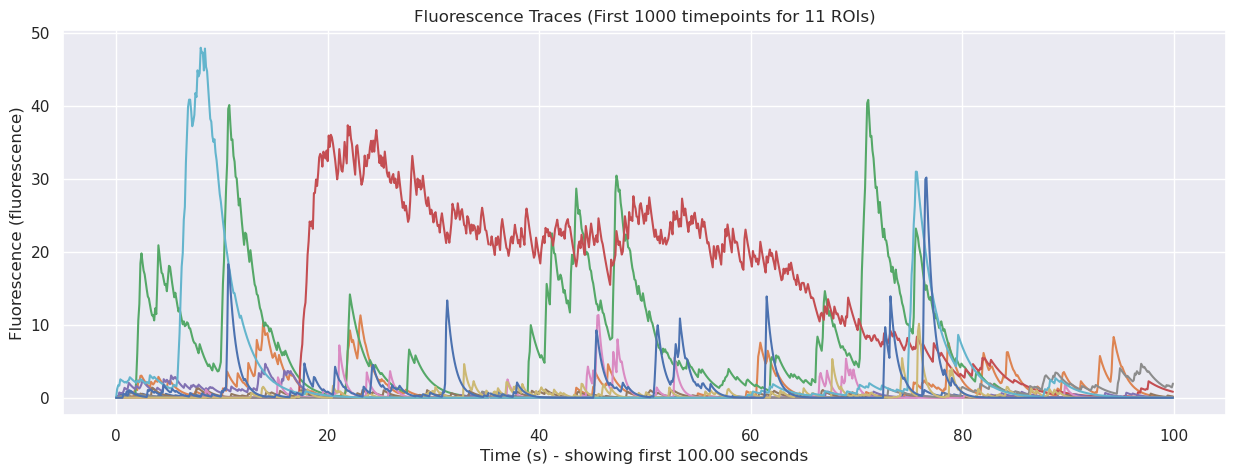

In [9]:
if nwbfile and "ophys" in nwbfile.processing and \
   "Fluorescence" in nwbfile.processing["ophys"].data_interfaces and \
   "RoiResponseSeries" in nwbfile.processing["ophys"]["Fluorescence"].roi_response_series:

    rrs = nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
    rrs_data = rrs.data
    num_rois = rrs_data.shape[1]
    num_timepoints = rrs_data.shape[0]

    print(f"Plotting fluorescence traces for {num_rois} ROIs over {num_timepoints} timepoints.")

    if num_timepoints > 0 and num_rois > 0:
        sns.set_theme()
        plt.figure(figsize=(15, 5))

        # Plot a subset of timepoints if the recording is too long for a clear plot
        timepoints_to_plot = min(1000, num_timepoints)
        time_vector = np.arange(timepoints_to_plot) / rrs.rate

        for i in range(num_rois):
            # Correctly access data: rrs_data is HDF5 dataset, slice to load into memory
            plt.plot(time_vector, rrs_data[:timepoints_to_plot, i], label=f'ROI {i+1}')
        
        plt.xlabel(f"Time (s) - showing first {timepoints_to_plot / rrs.rate:.2f} seconds")
        plt.ylabel(f"Fluorescence ({rrs.unit})")
        plt.title(f"Fluorescence Traces (First {timepoints_to_plot} timepoints for {num_rois} ROIs)")
        if num_rois <= 10: # Add legend only if not too many ROIs
            plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()
    else:
        print("No fluorescence data or ROIs to plot.")
else:
    print("RoiResponseSeries not found or NWB file not loaded, cannot plot fluorescence traces.")

### Visualizing ROI Image Masks (Spatial Footprints)

Next, we'll visualize the spatial footprints of the ROIs from `PlaneSegmentation`. These masks show the location and shape of each detected cell or ROI in the imaging field of view. We'll show a maximum projection of all masks.

Plotting image masks for 11 ROIs.


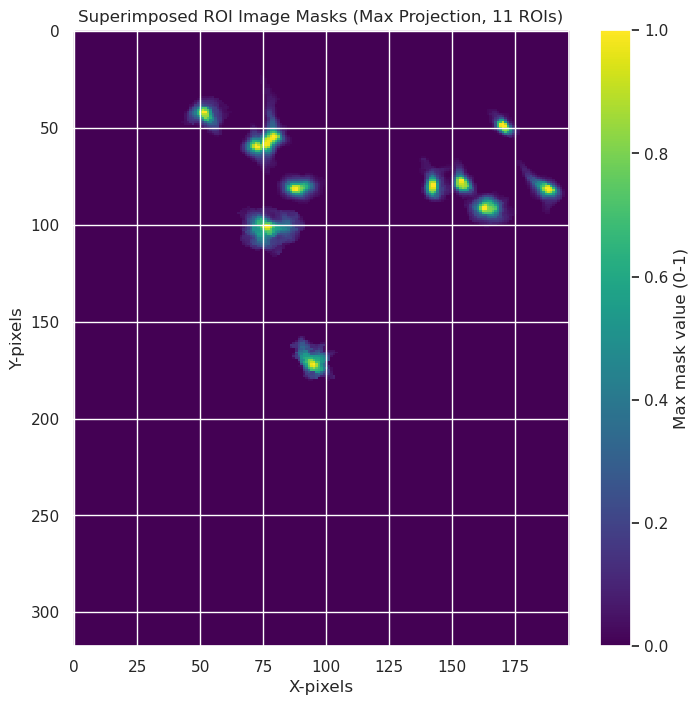

In [10]:
if nwbfile and "ophys" in nwbfile.processing and \
   "ImageSegmentation" in nwbfile.processing["ophys"].data_interfaces and \
   "PlaneSegmentation" in nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations:

    plane_seg = nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]
    image_masks_vd = plane_seg["image_mask"] # VectorData
    num_rois_ps = len(plane_seg.id)

    print(f"Plotting image masks for {num_rois_ps} ROIs.")

    if num_rois_ps > 0:
        # Get shape from the first mask
        first_mask_data = image_masks_vd[0] # This is a 2D numpy array (or HDF5 dataset for it)
        mask_shape_y, mask_shape_x = first_mask_data.shape

        # Prepare an array to hold all masks for max projection
        # Ensure dtype matches the mask data.
        all_masks_array = np.zeros((num_rois_ps, mask_shape_y, mask_shape_x), dtype=first_mask_data.dtype)

        for i in range(num_rois_ps):
            # Load each mask data: image_masks_vd[i] is the dataset for mask i
            all_masks_array[i, :, :] = image_masks_vd[i][:,:]

        max_projection = np.max(all_masks_array, axis=0)

        # Plotting without seaborn style for images
        # sns.reset_orig() # if seaborn was globally set and want to revert for this plot
        plt.figure(figsize=(8, 8))
        plt.imshow(max_projection, cmap='viridis', interpolation='nearest', aspect='auto')
        plt.title(f"Superimposed ROI Image Masks (Max Projection, {num_rois_ps} ROIs)")
        plt.xlabel("X-pixels")
        plt.ylabel("Y-pixels")
        plt.colorbar(label="Max mask value (0-1)")
        plt.show()
    else:
        print("No ROI masks found in PlaneSegmentation to plot.")
else:
    print("PlaneSegmentation not found or NWB file not loaded, cannot plot ROI masks.")

### Visualizing Raw Imaging Data (OnePhotonSeries) - A Small Snippet

The `OnePhotonSeries` contains the raw (or motion-corrected) video data from the microscope. This data can be very large. We will display a single frame as an example.
Note: Raw imaging frames might require contrast adjustments (e.g., setting `vmin` and `vmax` in `imshow`) to reveal details clearly.

OnePhotonSeries data shape: (5185, 1280, 800) (frames, y, x)


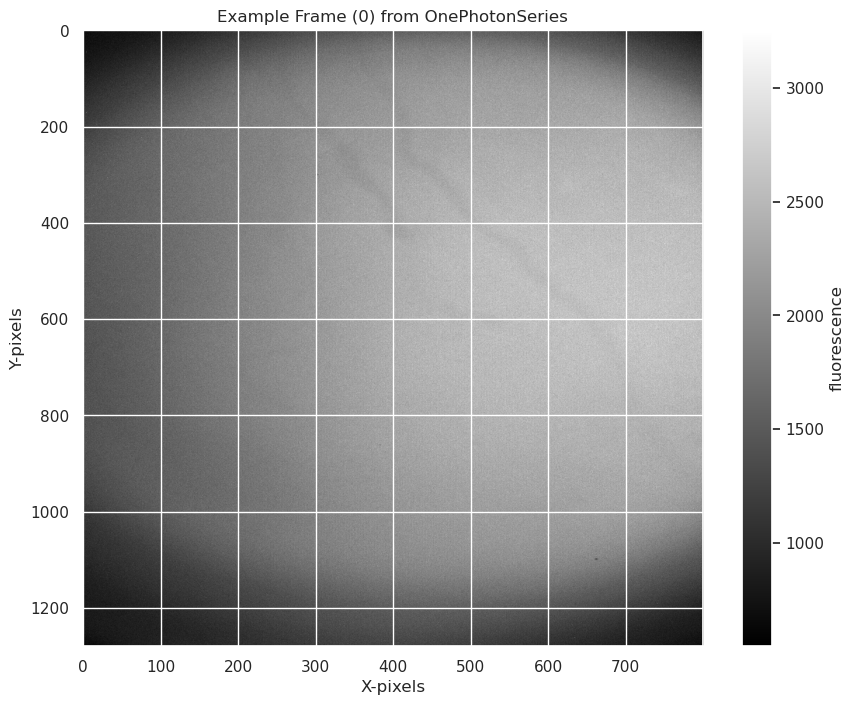

In [11]:
if nwbfile and "OnePhotonSeries" in nwbfile.acquisition:
    ops = nwbfile.acquisition["OnePhotonSeries"]
    ops_data = ops.data # This is an HDF5 dataset

    print(f"OnePhotonSeries data shape: {ops_data.shape} (frames, y, x)")

    if ops_data.shape[0] > 0:
        # Display the first frame
        frame_index_to_show = 0
        # Access a single frame: ops_data[frame_index, :, :]
        example_frame = ops_data[frame_index_to_show, :, :]

        plt.figure(figsize=(10, 8))
        plt.imshow(example_frame, cmap='gray', aspect='auto')
        plt.title(f"Example Frame ({frame_index_to_show}) from OnePhotonSeries")
        plt.xlabel("X-pixels")
        plt.ylabel("Y-pixels")
        plt.colorbar(label=f"{ops.unit}")
        plt.show()
    else:
        print("No frames in OnePhotonSeries to display.")
else:
    print("OnePhotonSeries not found or NWB file not loaded.")

### Visualizing Event Amplitudes

If `EventAmplitude` data is present, it typically represents the magnitude of detected neural events for each ROI. Let's plot these traces if available.

Plotting event amplitude traces for 11 ROIs over 5185 timepoints.


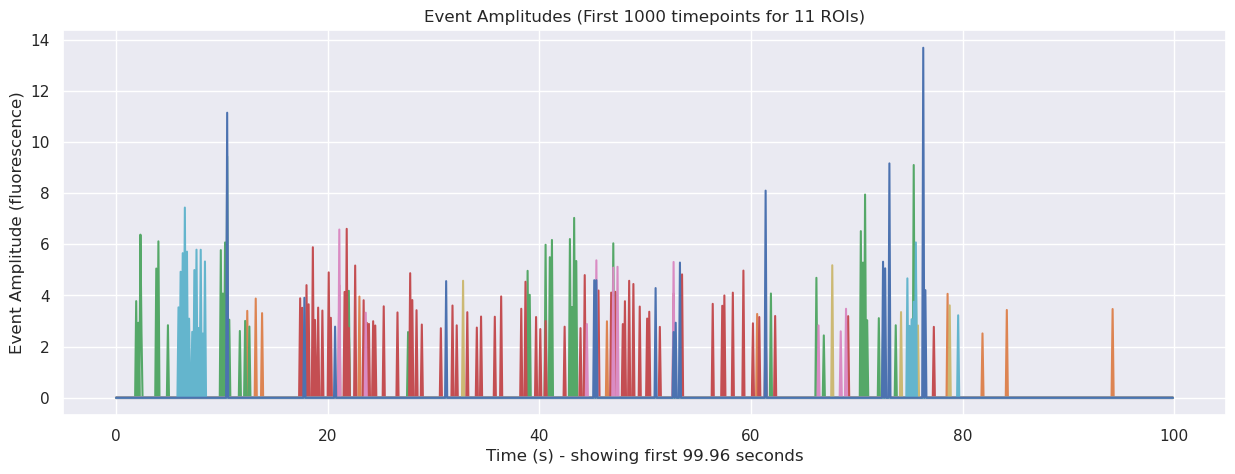

In [12]:
if nwbfile and "ophys" in nwbfile.processing and \
   "EventAmplitude" in nwbfile.processing["ophys"].data_interfaces:

    event_amp_series = nwbfile.processing["ophys"]["EventAmplitude"] # This is a RoiResponseSeries
    ea_data = event_amp_series.data
    num_rois_ea = ea_data.shape[1]
    num_timepoints_ea = ea_data.shape[0]

    print(f"Plotting event amplitude traces for {num_rois_ea} ROIs over {num_timepoints_ea} timepoints.")

    if num_timepoints_ea > 0 and num_rois_ea > 0:
        sns.set_theme() # Apply seaborn theme
        plt.figure(figsize=(15, 5))

        timepoints_to_plot_ea = min(1000, num_timepoints_ea)
        time_vector_ea = np.arange(timepoints_to_plot_ea) / event_amp_series.rate

        for i in range(num_rois_ea):
            plt.plot(time_vector_ea, ea_data[:timepoints_to_plot_ea, i], label=f'ROI {i+1} Event Amp.')
        
        plt.xlabel(f"Time (s) - showing first {timepoints_to_plot_ea / event_amp_series.rate:.2f} seconds")
        plt.ylabel(f"Event Amplitude ({event_amp_series.unit})")
        plt.title(f"Event Amplitudes (First {timepoints_to_plot_ea} timepoints for {num_rois_ea} ROIs)")
        if num_rois_ea <= 10:
            plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()
    else:
        print("No event amplitude data or ROIs to plot.")
else:
    print("EventAmplitude series not found or NWB file not loaded.")

## 4. Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI Archive and retrieve Dandiset information.
- Load an NWB file from the Dandiset `001174`.
- Inspect basic metadata and contents of the NWB file, focusing on optical physiology data.
- Visualize key `ophys` data:
    - Fluorescence traces of ROIs over time.
    - Spatial image masks of ROIs.
    - An example frame from the raw `OnePhotonSeries` imaging data.

### Possible Future Directions:

1.  **Detailed Event Analysis:** Analyze the `EventAmplitude` series (if present and populated) or perform event detection on the `RoiResponseSeries` to study the timing and properties of neural events.
2.  **Correlational Analysis:** Investigate correlations between the activity of different ROIs to understand functional connectivity.
3.  **Task-Related Activity:** If behavioral data (trials, stimuli, rewards) are available in other NWB files or sections of this file (not explored here), one could analyze how neural activity relates to specific task events. This Dandiset mentions a "reaching task."
4.  **Comparison Across Sessions/Subjects:** Extend the analysis to other NWB files in the Dandiset to compare neural activity patterns across different experimental sessions, conditions, or subjects (e.g., `sub-F` vs `sub-Q`).
5.  **Advanced Visualization:** Create more sophisticated visualizations, such as raster plots of event times, or overlaying ROI activity on the imaging field of view.

This notebook provides a foundational toolkit. Researchers can adapt and expand upon these examples to delve deeper into the specifics of Dandiset 001174 and address their scientific questions.

Remember to close the NWB file I/O object if you are done with it to free up resources, especially when working with multiple files or in loops.

In [13]:
# Ensure all file objects are closed
if 'io' in locals() and io is not None:
    try:
        io.close()
        print("NWBHDF5IO (io) closed a.k.a. NWB file I/O closed.") # Clarified message
    except Exception as e:
        print(f"Error closing NWBHDF5IO (io): {e}")

# h5_f should ideally be closed by io.close() if io was successfully initialized with it.
# This is an additional check, particularly if io.close() failed or was bypassed.
if 'h5_f' in locals() and h5_f is not None:
    try:
        if h5_f.id.valid: # Check if file is still open using h5py's way
             h5_f.close()
             print("HDF5 file (h5_f) explicitly closed.")
        else:
            print("HDF5 file (h5_f) was already closed or not validly opened.")
    except Exception as e:
        print(f"Error explicitly closing HDF5 file (h5_f): {e}")

if 'remote_f' in locals() and remote_f is not None:
    try:
        remote_f.close() # remfile objects have a close method
        print("remfile (remote_f) explicitly closed.")
    except Exception as e:
        print(f"Error explicitly closing remfile (remote_f): {e}")

NWBHDF5IO (io) closed a.k.a. NWB file I/O closed.
HDF5 file (h5_f) was already closed or not validly opened.
remfile (remote_f) explicitly closed.


---
End of Notebook.
---